## African universities
This notebook is to obtain a comprehensive list of African universities form two different sources of data:
    _local csv file containing university information, which includes details such as university name, country, longitude and latitude.
    _universities library, which provides programmatic access to a vast collection of university information.
By combining data from these sources, the notebook aims to create a more complete and accurate list of African universities.

The resulting dataset can be used for various purposes, such as research, analysis, or generating insights into higher education across the African continent.

## local csv file

In [1]:
from pandas import pandas
from data_all import universities, universities_details

import warnings

# Suppress FutureWarning and UserWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
 
pandas.set_option('display.max_colwidth', None)
program_df = pandas.DataFrame(universities_details)
program_df['continent'] = 'Africa'
program_df.head(2)


,name,country,longitude,latitude,continent
0,University of Cape Town,South Africa,-18.4719,-33.9628,Africa
1,Stellenbosch University,South Africa,-18.8679,-33.9321,Africa


In [2]:
seen_universities = set()
unique_universities = []
print(len(universities_details))
for university in universities_details:
    # print(university)
    university_name = university.get("name")
    if university_name not in seen_universities:
        seen_universities.add(university_name)
        unique_universities.append(university)

program_df = pandas.DataFrame(unique_universities)
 
print(len(program_df))
# universities_details.head(2)


program_df.loc[program_df['name'] == 'Stellenbosch University', ['longitude', 'latitude']] = [18.8679, -33.9321]
program_df.loc[program_df['name'] == 'University of Cape Town', ['longitude', 'latitude']] = [18.4719, -33.9628]


144
74


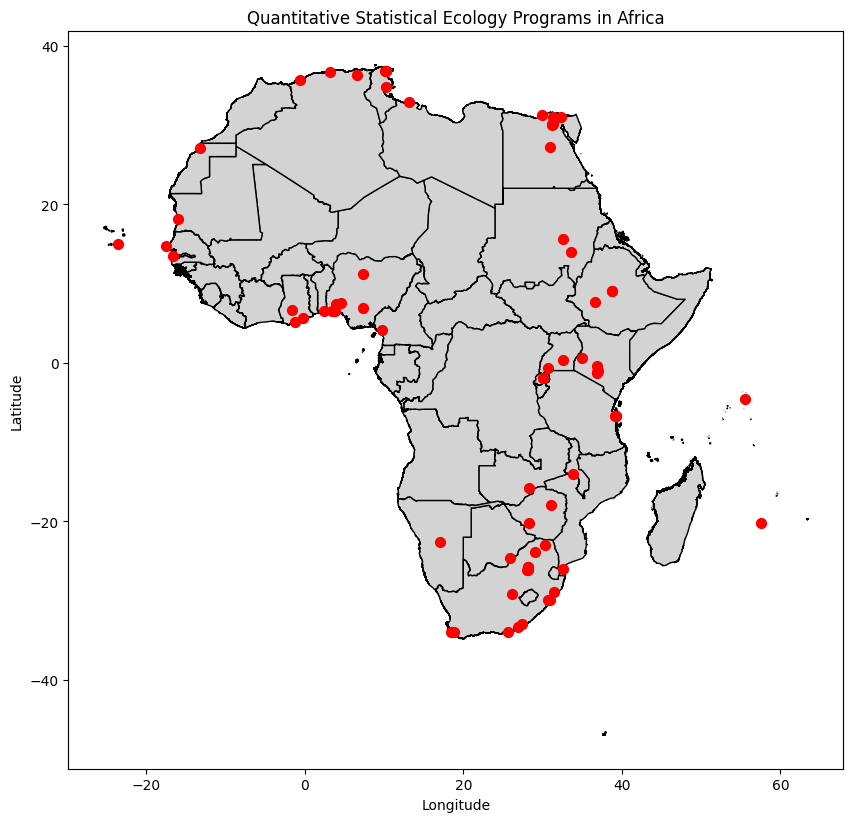

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scripts import map_plot
import os

# Get the current directory (path) of the notebook
notebook_path = os.getcwd()

# Specify the name of the child directory or file
child_name = "afr_g2014_2013_0/afr_g2014_2013_0.shp"  # Replace with the desired child directory or file name

# Construct the path to the child directory or file
child_path = os.path.join(notebook_path, child_name)
 
 
africa_shapefile = child_path # Replace with the actual file path

map_plot(africa_shapefile,program_df)

## universities library

In [4]:
import pandas as pd
import universities

uni = universities.API()

try:
    df = pd.read_parquet('data_universities.parquet')
except FileNotFoundError:
    all_data = uni.get_all()
    df = pd.DataFrame(all_data)
    df.rename(columns={0: 'data'}, inplace=True)

    df.to_parquet('data_universities.parquet')

 

df


,Name,Country,Country (English)
0,Kharkiv National University,Ukraine,Ukraine
1,Universidad Técnica Federico Santa María,Chile,Chile
2,IÉSEG School of Management,France,France
3,Sun Yat-Sen University,China,China
4,Royal Holloway University of London,United Kingdom,United Kingdom
...,...,...,...
9929,Texas Wesleyan University,United States,United States
9930,Howest University of Applied Sciences,Belgium,Belgium
9931,Nazarbayev University,Kazakhstan,Kazakhstan
9932,St. George's University (Australia),Australia,Australia


##  get a list of countries in Africa using the "awoc" library

In [5]:

import awoc
# Initialize the AWOC class.
my_world = awoc.AWOC()
# Let's fetch the list of nations of Africa.
nations_of_Africa = my_world.get_countries_list_of('Africa')
# nations_of_Africa

### Convert country name to its corresponding continent using pycountry_convert

Convert a given country name to its corresponding continent. We uses the pycountry_convert library to perform the conversion. The function, named country_to_continent, takes a country name as input and returns the continent name as output.

In [6]:
import pandas as pd
import pycountry_convert as pc

def country_to_continent(country_name):
    """
    This function is or categorizing countries into their respective continents based on their names. 
        input: a valid  country name
        output:  th corresponding continent name for the given country
    """
    try:
        if country_name == 'Vatican City':
            return 'Europe'
        else:
            country_alpha2 = pc.country_name_to_country_alpha2(country_name)
            country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
            country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
            return country_continent_name
    except KeyError:
        return 'Unknown'

# Apply the country_to_continent function to the 'Country' column and store the result in a new 'Continent' column
df['continent'] = df['Country (English)'].apply(country_to_continent)
df

,Name,Country,Country (English),continent
0,Kharkiv National University,Ukraine,Ukraine,Europe
1,Universidad Técnica Federico Santa María,Chile,Chile,South America
2,IÉSEG School of Management,France,France,Europe
3,Sun Yat-Sen University,China,China,Asia
4,Royal Holloway University of London,United Kingdom,United Kingdom,Europe
...,...,...,...,...
9929,Texas Wesleyan University,United States,United States,North America
9930,Howest University of Applied Sciences,Belgium,Belgium,Europe
9931,Nazarbayev University,Kazakhstan,Kazakhstan,Asia
9932,St. George's University (Australia),Australia,Australia,Oceania


## filter African Univeristies

In [7]:
df_africa = df[df['continent'].str.contains('Africa')]
# Reindex the DataFrame
df_africa = df_africa.reset_index(drop=True)

df_africa

,Name,Country,Country (English),continent
0,Université Amar Telidji,Algeria,Algeria,Africa
1,Université M'hamed Bouguerra de Boumerdes,Algeria,Algeria,Africa
2,Université Mentouri Constantine,Algeria,Algeria,Africa
3,Université Mouloud Mammeri de Tizi Ouzou,Algeria,Algeria,Africa
4,Université d'Alger 3,Algeria,Algeria,Africa
...,...,...,...,...
615,Clark Atlanta University,GA,Gabon,Africa
616,Morehouse,GA,Gabon,Africa
617,Deraya University,New Minia,Egypt,Africa
618,North-West Univeristy,South Africa,South Africa,Africa


## get location coordnates

In [8]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

def add_coordinates(df, uni_address_column, coun_address_column):
    geolocator = Nominatim(user_agent="university-locator")
    df['Latitude'] = None
    df['Longitude'] = None

    def geocode_with_timeout(address):
        try:
            location = geolocator.geocode(address)
            return location
        except GeocoderTimedOut:
            return geocode_with_timeout(address)
        except Exception as e:
            # print(f"Geocoding error for address '{address}': {str(e)}")
            return None

    for index, row in df.iterrows():
        uni_address = row[uni_address_column]
        coun_address = row[coun_address_column]
        location = geocode_with_timeout(uni_address)

        if location is None:
            location = geocode_with_timeout(coun_address)

        if location:
            df.at[index, 'latitude'] = location.latitude
            df.at[index, 'longitude'] = location.longitude

    return df

try:
    df_with_coordinates = pd.read_parquet('df_with_coordinates.parquet')
except FileNotFoundError:
    df_with_coordinates = add_coordinates(df_africa, 'Name', 'Country')

    df_with_coordinates.to_parquet('df_with_coordinates.parquet')

 

df_with_coordinates = df_with_coordinates.drop("Country", axis=1)
df_with_coordinates = df_with_coordinates.rename(columns={'Country (English)': 'country','Name': 'name','Latitude': 'latitude','Longitude': 'longitude','Continent': 'continent'})
df_with_coordinates

,name,country,continent,latitude,longitude
0,Université Amar Telidji,Algeria,Africa,33.799997,2.852186
1,Université M'hamed Bouguerra de Boumerdes,Algeria,Africa,28.000027,2.999983
2,Université Mentouri Constantine,Algeria,Africa,36.339137,6.622462
3,Université Mouloud Mammeri de Tizi Ouzou,Algeria,Africa,36.697899,4.057747
4,Université d'Alger 3,Algeria,Africa,36.757128,2.984307
...,...,...,...,...,...
615,Clark Atlanta University,Gabon,Africa,33.750125,-84.411589
616,Morehouse,Gabon,Africa,32.832696,-91.837413
617,Deraya University,Egypt,Africa,24.768802,46.590220
618,North-West Univeristy,South Africa,Africa,13.149154,123.753557


## find none values if there are any

In [9]:
def find_none_values(df):
    null_rows = df[df['latitude'].isnull() & df['longitude'].isnull()]
    return null_rows
none_values_df = find_none_values(df_with_coordinates)
none_values_df

,name,country,continent,latitude,longitude


## concatenate the two DataFrames together

In [10]:
dff_loc = pd.read_parquet('add_universities_data.parquet')
dff_loc = dff_loc.rename(columns={'Latitude': 'latitude','Longitude': 'longitude'})
 
concatenated_df = pd.concat([df_with_coordinates, program_df,dff_loc], ignore_index=True)
concatenated_df.to_parquet('data_universities_all.parquet')
concatenated_df

,name,country,continent,latitude,longitude
0,Université Amar Telidji,Algeria,Africa,33.799997,2.852186
1,Université M'hamed Bouguerra de Boumerdes,Algeria,Africa,28.000027,2.999983
2,Université Mentouri Constantine,Algeria,Africa,36.339137,6.622462
3,Université Mouloud Mammeri de Tizi Ouzou,Algeria,Africa,36.697899,4.057747
4,Université d'Alger 3,Algeria,Africa,36.757128,2.984307
...,...,...,...,...,...
905,University of Gemena,DRC,Africa,-2.981434,23.822264
906,University of Gandajika,DRC,Africa,-2.981434,23.822264
907,University of Isiro,DRC,Africa,-2.981434,23.822264
908,University of Kalemie,DRC,Africa,-2.981434,23.822264


## plot

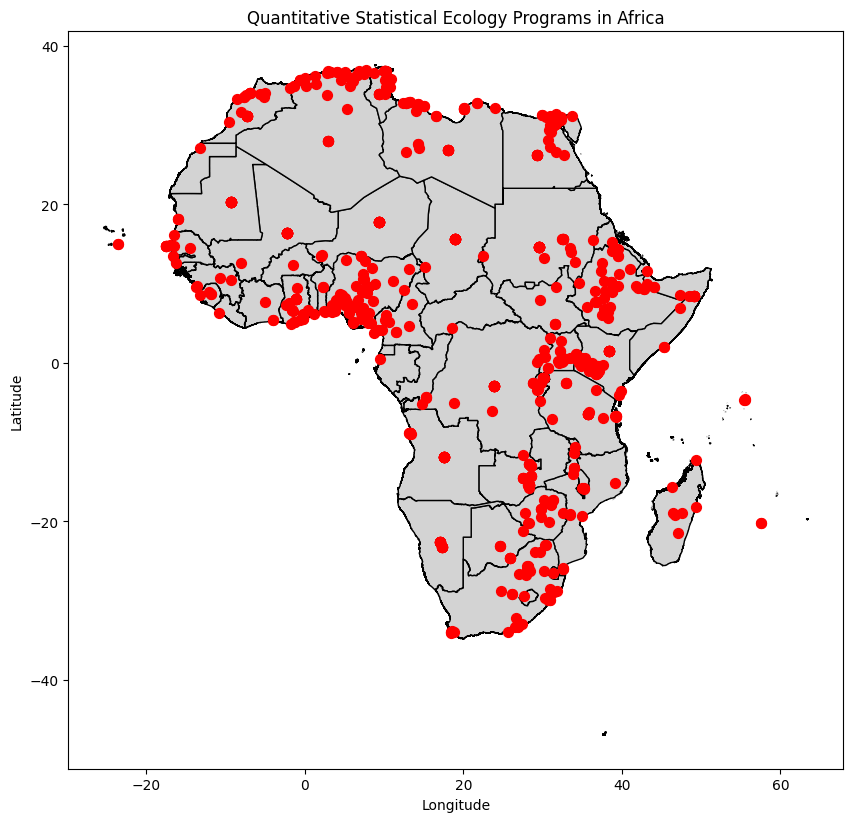

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scripts import map_plot


map_plot(africa_shapefile,concatenated_df)